#### load regular packages


In [17]:
import pandas as pd
import numpy as np
from pprint import pprint
import re, os, operator
import collections
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### nltk - primary NLP package along with 're'


In [86]:
import nltk
from nltk.corpus import stopwords

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### spacy - text comprehension package


In [5]:
import spacy


#### package for counting term usage


In [6]:
from sklearn.feature_extraction.text import CountVectorizer


#### gensim - topic modeling package


In [180]:
import gensim
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

# set link to LDA Mallet java package on computer: http://mallet.cs.umass.edu/download.php
#os.environ.update({'MALLET_HOME':r'C:/Users/dream/AppData/Local/Temp/new_mallet/mallet-2.0.8',
                 # 'JAVA_HOME': r'E:/coding/BUNQ1/jdk4py'})

mallet_path = r'E:\coding\BUNQ1\mallet\mallet-2.0.8\mallet-2.0.8\bin\mallet'

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### pyldavis - plotting package for topic models


In [10]:
import pyLDAvis
from pyLDAvis import gensim as gen

#### Load the regular expression library


In [11]:
import re


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Import data


In [12]:
reviews = pd.read_csv("reviews_1_txt.txt", sep=';')


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(reviews.info())


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stars       41 non-null     int64 
 1   pros        41 non-null     object
 2   cons        41 non-null     object
 3   advice_mgm  24 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB
None


#### For the first analysis, I will remove the advice_mgm columns since it has null values. 

In [16]:
no_advice = reviews.dropna(axis='columns')
print(type(no_advice))
print(no_advice.describe())
print(no_advice.columns)

<class 'pandas.core.frame.DataFrame'>
           stars
count  41.000000
mean    2.804878
std     1.777913
min     1.000000
25%     1.000000
50%     2.000000
75%     5.000000
max     5.000000
Index(['stars', 'pros', 'cons'], dtype='object')


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


As we can see, our document is comprised of 41 reviews that give between 1 and 5 stars, with a mean of 2,80. 

### Star rating visualization in matplotlib

As we can observe from the graph below, the most reviews gave 1 star followed by the 5 star ratings. 

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Count number')

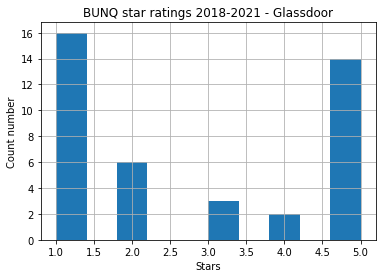

In [21]:
no_advice['stars'].hist()

plt.title('BUNQ star ratings 2018-2021 - Glassdoor')

plt.xlabel('Stars')
plt.ylabel('Count number')


### Preprocessing the text

In [23]:
# Remove punctuation
no_advice['pros_preprocessed'] = \
no_advice['pros'].map(lambda x: re.sub('[,\.!?]', '', x))

#print(no_advice.pros_preprocessed)

no_advice['cons_preprocessed'] = \
no_advice['cons'].map(lambda x: re.sub('[,\.!?]', '', x))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<ipython-input-23-4ce0e0a67f8a>:3: DeprecationWarning: invalid escape sequence \.
  no_advice['pros'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-23-4ce0e0a67f8a>:8: DeprecationWarning: invalid escape sequence \.
  no_advice['cons'].map(lambda x: re.sub('[,\.!?]', '', x))


In [26]:
# Convert to lowercase
no_advice['pros_preprocessed'] = \
no_advice['pros_preprocessed'].map(lambda x: x.lower())

#print(no_advice.pros_preprocessed)

no_advice['cons_preprocessed'] = \
no_advice['cons_preprocessed'].map(lambda x: x.lower())

#print(no_advice.cons_preprocessed.head())

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
no_advice.all_text = no_advice.pros + ' ' + no_advice.cons
print('Average review length: ' + str(no_advice.all_text.str.split().str.len().mean()))


Average review length: 114.39024390243902


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# Change all_text to list

review1 = no_advice.all_text.values.tolist()
review_pros1 = no_advice.pros.values.tolist()
review_cons1 = no_advice.cons.values.tolist()


print(review1[:1])
print(review_pros1[:1])
print(review_cons1[:1])

['People are smart and fun to work with Very fast paced, can lead to frustrations at times']
['People are smart and fun to work with']
['Very fast paced, can lead to frustrations at times']


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Textual data pre-processing for the entire text and separately, for pros and cons


In [61]:

review2 = []

for sentence in range(0, len(review1)):
    
    # Add spaces if two words appear to be concatenated by mistake
    p_review = re.sub(r'(\w)([A-Z])', r'\1 \2', str(review1[sentence]))
    
    # Remove all the special characters
    p_review = re.sub(r'\W', ' ', p_review)

    # remove all numbers
    p_review = re.sub(r'\d+','', p_review)
    
    # Remove single characters from the start
    p_review = re.sub(r'\^[a-zA-Z]\s+', ' ', p_review) 

    # Substituting multiple spaces with single space
    p_review = re.sub(r'\s+', ' ', p_review, flags=re.I)

    # Remove prefixed 'b', if present
    p_review = re.sub(r'^b\s+', '', p_review)
    

    review2.append(p_review)
    
print(review2[:1])


review_pros2 = []

for sentence in range(0, len(review_pros1)):
    
    # Add spaces if two words appear to be concatenated by mistake
    p_review_pros = re.sub(r'(\w)([A-Z])', r'\1 \2', str(review_pros1[sentence]))
    
    # Remove all the special characters
    p_review_pros = re.sub(r'\W', ' ', p_review_pros)

    # remove all numbers
    p_review_pros = re.sub(r'\d+','', p_review_pros)
    
    # Remove single characters from the start
    p_review_pros = re.sub(r'\^[a-zA-Z]\s+', ' ', p_review_pros) 

    # Substituting multiple spaces with single space
    p_review_pros = re.sub(r'\s+', ' ', p_review_pros, flags=re.I)

    # Remove prefixed 'b', if present
    p_review_pros = re.sub(r'^b\s+', '', p_review_pros)
    

    review_pros2.append(p_review_pros)
    
print(review_pros2[:1])

review_cons2 = []

for sentence in range(0, len(review_cons1)):
    
    # Add spaces if two words appear to be concatenated by mistake
    p_review_cons = re.sub(r'(\w)([A-Z])', r'\1 \2', str(review_cons1[sentence]))
    
    # Remove all the special characters
    p_review_cons = re.sub(r'\W', ' ', p_review_cons)

    # remove all numbers
    p_review_cons = re.sub(r'\d+','', p_review_cons)
    
    # Remove single characters from the start
    p_review_cons = re.sub(r'\^[a-zA-Z]\s+', ' ', p_review_cons) 

    # Substituting multiple spaces with single space
    p_review_cons = re.sub(r'\s+', ' ', p_review_cons, flags=re.I)

    # Remove prefixed 'b', if present
    p_review_cons = re.sub(r'^b\s+', '', p_review_cons)
    

    review_cons2.append(p_review_cons)
    
print(review_cons2[:1])


['People are smart and fun to work with Very fast paced can lead to frustrations at times']
['People are smart and fun to work with']
['Very fast paced can lead to frustrations at times']


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# Change strings to bag-of-words

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# All text
review_words = list(sent_to_words(review2))

print(review_words[:1])

# Pros
review_pros_words = list(sent_to_words(review_pros2))
print(review_pros_words[:1])

# Cons
review_cons_words = list(sent_to_words(review_cons2))
print(review_cons_words[:1])

[['people', 'are', 'smart', 'and', 'fun', 'to', 'work', 'with', 'very', 'fast', 'paced', 'can', 'lead', 'to', 'frustrations', 'at', 'times']]
[['people', 'are', 'smart', 'and', 'fun', 'to', 'work', 'with']]
[['very', 'fast', 'paced', 'can', 'lead', 'to', 'frustrations', 'at', 'times']]


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

nlp = spacy.load("en")
stop_words = stopwords.words('english')


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
# Reducing the term count (implement)

# Entire text
review_lemma = lemmatization(review_words)

review_lemma = remove_stopwords(review_lemma)

print(review_lemma[:1])

# Pros
pros_lemma = lemmatization(review_pros_words)
pros_lemma = remove_stopwords(pros_lemma)
print(pros_lemma[:1])

# Cons
cons_lemma = lemmatization(review_cons_words)
cons_lemma = remove_stopwords(cons_lemma)
print(cons_lemma[:1])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['people', 'smart', 'fun', 'work', 'fast', 'pace', 'lead', 'frustration', 'time']]
[['people', 'smart', 'fun', 'work']]
[['fast', 'pace', 'lead', 'frustration', 'time']]


In [100]:
# Inspect most frequent terms in all reviews

def detoken(texts):
    """detokenizer"""
    texts_out = []
    for sent in texts:
        texts_out.append(" ".join(s for s in sent))
    return texts_out

review_lemma_test = detoken(review_lemma)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review_lemma_test)
freq = np.ravel(X.sum(axis=0)) 

vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
fdist = dict(zip(vocab, freq))

# Save all terms as CSV file to inspect all

with open('term_dict.csv', 'w', encoding='utf-8') as f:
    for key in fdist.keys():
        f.write("%s,%s\n"%(key,fdist[key]))



C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
# Inspect most frequent terms in pros

def detoken(texts):
    """detokenizer"""
    texts_out = []
    for sent in texts:
        texts_out.append(" ".join(s for s in sent))
    return texts_out

pros_lemma_test = detoken(pros_lemma)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(pros_lemma_test)
freq = np.ravel(X.sum(axis=0)) 

vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
fdist = dict(zip(vocab, freq))

# Save all terms as CSV file to inspect all

with open('pros_dict.csv', 'w', encoding='utf-8') as f:
    for key in fdist.keys():
        f.write("%s,%s\n"%(key,fdist[key]))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
# Inspect most frequent terms in cons

def detoken(texts):
    """detokenizer"""
    texts_out = []
    for sent in texts:
        texts_out.append(" ".join(s for s in sent))
    return texts_out

cons_lemma_test = detoken(cons_lemma)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cons_lemma_test)
freq = np.ravel(X.sum(axis=0)) 

vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
fdist = dict(zip(vocab, freq))

# Save all terms as CSV file to inspect all

with open('cons_dict.csv', 'w', encoding='utf-8') as f:
    for key in fdist.keys():
        f.write("%s,%s\n"%(key,fdist[key]))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
# Create a document-term-matrix (DTM) for all reviews

# Create Dictionary
id2word = Dictionary(review_lemma)
print("Length of initial dictionary is: ", (len(id2word)))

id2word.filter_extremes(no_below=3, no_above=0.5)
print("Length of reduced dictionary is: ", (len(id2word)))

# Create Corpus
texts = review_lemma

# Term Document Frequency
corpus1 = [id2word.doc2bow(text) for text in texts]

# View
print(corpus1[:1])
print(id2word)

Length of initial dictionary is:  848
Length of reduced dictionary is:  170
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]
Dictionary(170 unique tokens: ['fast', 'fun', 'lead', 'pace', 'people']...)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
# Create a document-term-matrix (DTM) for pros

# Create Dictionary
id2word_pros = Dictionary(pros_lemma)
print("Length of initial dictionary is: ", (len(id2word_pros)))

id2word_pros.filter_extremes(no_below=3, no_above=0.5)
print("Length of reduced dictionary is: ", (len(id2word_pros)))

# Create Corpus
texts = pros_lemma

# Term Document Frequency
corpus2 = [id2word_pros.doc2bow(text) for text in texts]

# View
print(corpus2[:1])
print(id2word_pros)

Length of initial dictionary is:  370
Length of reduced dictionary is:  59
[[(0, 1), (1, 1), (2, 1), (3, 1)]]
Dictionary(59 unique tokens: ['fun', 'people', 'smart', 'work', 'development']...)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
# Create a document-term-matrix (DTM) for cons

# Create Dictionary
id2word_cons = Dictionary(cons_lemma)
print("Length of initial dictionary is: ", (len(id2word_cons)))

id2word_cons.filter_extremes(no_below=3, no_above=0.5)
print("Length of reduced dictionary is: ", (len(id2word_cons)))

# Create Corpus
texts = cons_lemma

# Term Document Frequency
corpus3 = [id2word_cons.doc2bow(text) for text in texts]

# View
print(corpus3[:1])
print(id2word_cons)

Length of initial dictionary is:  653
Length of reduced dictionary is:  110
[[(0, 1), (1, 1), (2, 1), (3, 1)]]
Dictionary(110 unique tokens: ['fast', 'lead', 'pace', 'time', 'one']...)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
# Find low term documents and remove (less than 3 terms per document) for all reviews

# Convert corpus to a numpy matrix
numpy_matrix = gensim.matutils.corpus2dense(corpus1, num_terms=len(id2word)) # adjust based on length of dictionary

# Create a filtered matrix that removes docs with less than 3 terms
n_matrix2 = numpy_matrix[:, (numpy_matrix != 0).sum(axis=0) > 2]

# Convert matrix back to a corpus
corpus = gensim.matutils.Dense2Corpus(n_matrix2)

# Confirm change has been made
print(len(corpus1)) # original corpus
print(len(corpus)) # new corpus

41
33


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
# Find low term documents and remove (less than 3 terms per document) for pros

# Convert corpus to a numpy matrix
numpy_matrix = gensim.matutils.corpus2dense(corpus2, num_terms=len(id2word_pros)) # adjust based on length of dictionary

# Create a filtered matrix that removes docs with less than 3 terms
n_matrix2_pros = numpy_matrix[:, (numpy_matrix != 0).sum(axis=0) > 2]

# Convert matrix back to a corpus
corpus_pros = gensim.matutils.Dense2Corpus(n_matrix2_pros)

# Confirm change has been made
print(len(corpus2)) # original corpus
print(len(corpus_pros)) # new corpus

41
34


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
# Find low term documents and remove (less than 3 terms per document) for cons

# Convert corpus to a numpy matrix
numpy_matrix = gensim.matutils.corpus2dense(corpus3, num_terms=len(id2word_cons)) # adjust based on length of dictionary

# Create a filtered matrix that removes docs with less than 3 terms
n_matrix2_cons = numpy_matrix[:, (numpy_matrix != 0).sum(axis=0) > 2]

# Convert matrix back to a corpus
corpus_cons = gensim.matutils.Dense2Corpus(n_matrix2_cons)

# Confirm change has been made
print(len(corpus3)) # original corpus
print(len(corpus_cons)) # new corpus

41
33


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



## Topic modeling
Uncovering the hidden or latent topics across a set of reviews.

In [159]:

# The topic models (without need to use external java package)

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    alpha = [0.1, 1, 10]
    random_seed = [32, 64]
    coherence_values = []
    model_list = []
    output_list = []
    for num_topics in range(start, limit, step):
        for a in alpha:
            for r in random_seed:
                model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=r, alpha=a, workers=3)
                model_list.append(model)
                coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
                coherence_values.append(coherencemodel.get_coherence())
                model_output ={'alpha': a, 'random_seed': r, 'coherence': coherencemodel.get_coherence(), 'num_topics': num_topics}
                output_list.append(model_output)
              
    return model_list, coherence_values, output_list

model_list, coherence_values, output_list = compute_coherence_values(dictionary=id2word,
                                                                     corpus=corpus, texts=texts, start=4, limit=18, step=2)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Miniconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\ProgramData\Miniconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [161]:
# Inspect the models

output_list_descending = sorted(output_list, key=lambda d: d['coherence'], reverse=True)
print(output_list_descending)

[{'alpha': 0.1, 'random_seed': 32, 'coherence': nan, 'num_topics': 4}, {'alpha': 0.1, 'random_seed': 64, 'coherence': nan, 'num_topics': 4}, {'alpha': 1, 'random_seed': 32, 'coherence': nan, 'num_topics': 4}, {'alpha': 1, 'random_seed': 64, 'coherence': nan, 'num_topics': 4}, {'alpha': 10, 'random_seed': 32, 'coherence': nan, 'num_topics': 4}, {'alpha': 10, 'random_seed': 64, 'coherence': nan, 'num_topics': 4}, {'alpha': 0.1, 'random_seed': 32, 'coherence': nan, 'num_topics': 6}, {'alpha': 0.1, 'random_seed': 64, 'coherence': nan, 'num_topics': 6}, {'alpha': 1, 'random_seed': 32, 'coherence': nan, 'num_topics': 6}, {'alpha': 1, 'random_seed': 64, 'coherence': nan, 'num_topics': 6}, {'alpha': 10, 'random_seed': 32, 'coherence': nan, 'num_topics': 6}, {'alpha': 10, 'random_seed': 64, 'coherence': nan, 'num_topics': 6}, {'alpha': 0.1, 'random_seed': 32, 'coherence': nan, 'num_topics': 8}, {'alpha': 0.1, 'random_seed': 64, 'coherence': nan, 'num_topics': 8}, {'alpha': 1, 'random_seed': 32,

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
# Best Model (1) - 4 topics (random_state=32, alpha=0.1)

ldamallet4 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=id2word, random_seed=32, alpha=0.1, workers=3)

# Show Topics
pprint(ldamallet4.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet4 = CoherenceModel(model=ldamallet4, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet4 = coherence_model_ldamallet4.get_coherence()

print('\nCoherence Score: ', coherence_ldamallet4)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CalledProcessError: Command 'E:\coding\BUNQ1\mallet\mallet-2.0.8\mallet-2.0.8\bin\mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input C:\Users\dream\AppData\Local\Temp\631d60_corpus.txt --output C:\Users\dream\AppData\Local\Temp\631d60_corpus.mallet' returned non-zero exit status 1.

### Wordcloud

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


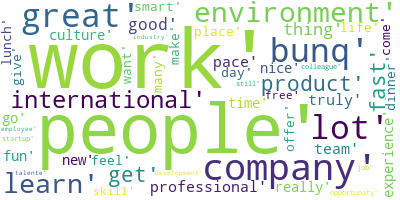

In [110]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
pros_string = ','.join(list(no_advice['pros_preprocessed'].values))


# Create a WordCloud object
wordcloud_pros = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')

# Generate a word cloud for pros and cons
wordcloud_pros.generate(pros_string)
#wordcloud.generate(cons_string)

# Visualize the word cloud
wordcloud_pros.to_image()




C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


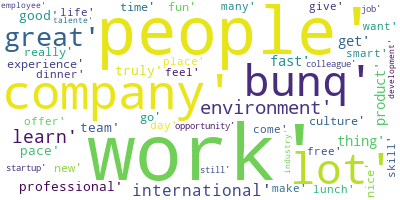

In [111]:
# Wordcloud pros after lemmatization
wordcloud_pros_lemma = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
wordcloud_pros_lemma.generate(str(pros_lemma))
wordcloud_pros_lemma.to_image()

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


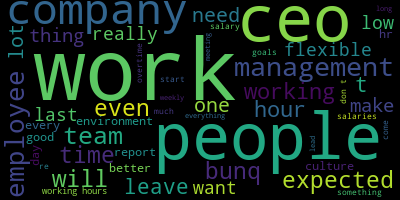

In [37]:
from wordcloud import WordCloud

cons_string = ','.join(list(no_advice['cons_preprocessed'].values))
wordcloud_cons = WordCloud(background_color="black", max_words=50, contour_width=3, contour_color='steelblue')
wordcloud_cons.generate(cons_string)
wordcloud_cons.to_image()

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


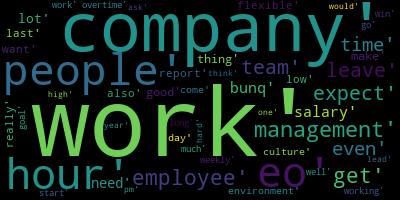

In [112]:
# Wordcloud cons after lemmatization

wordcloud_cons_lemma = WordCloud(background_color="black", max_words=50, contour_width=3, contour_color='steelblue')
wordcloud_cons_lemma.generate(str(cons_lemma))
wordcloud_cons_lemma.to_image()